In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import datetime

from datetime import timedelta, datetime, date
import calendar

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
!which python

/home/clepore/.conda/envs/updated_general_python2_7/bin/python


In [3]:
import Nio

In [9]:
ls /Data2/SubX/NCEP/CFSv2/forecast -U | head -4

pr_sfc_CFS_01feb2018_00z_d00_d44_m01.nc
pr_sfc_CFS_01feb2018_00z_d00_d44_m02.nc
pr_sfc_CFS_01feb2018_00z_d00_d44_m03.nc
pr_sfc_CFS_01feb2018_00z_d00_d44_m04.nc
ls: write error


In [3]:
ls /Data2/SubX/ECCC/forecast -U | head -4

subX_realtime_ECCC_2017072700_m00.tar
subX_realtime_ECCC_2017072700_m01.tar
subX_realtime_ECCC_2017072700_m02.tar
subX_realtime_ECCC_2017072700_m03.tar
ls: write error


In [53]:
!ls /Data2/SubX/RSMAS/CCSM4/pr/2000/12


pr_sfc_CCSM4_02dec2000_00z_d01_d45_m01.nc
pr_sfc_CCSM4_02dec2000_00z_d01_d45_m02.nc
pr_sfc_CCSM4_02dec2000_00z_d01_d45_m03.nc
pr_sfc_CCSM4_03dec2000_00z_d01_d45_m01.nc
pr_sfc_CCSM4_03dec2000_00z_d01_d45_m02.nc
pr_sfc_CCSM4_03dec2000_00z_d01_d45_m03.nc
pr_sfc_CCSM4_09dec2000_00z_d01_d45_m01.nc
pr_sfc_CCSM4_09dec2000_00z_d01_d45_m02.nc
pr_sfc_CCSM4_09dec2000_00z_d01_d45_m03.nc
pr_sfc_CCSM4_10dec2000_00z_d01_d45_m01.nc
pr_sfc_CCSM4_10dec2000_00z_d01_d45_m02.nc
pr_sfc_CCSM4_10dec2000_00z_d01_d45_m03.nc
pr_sfc_CCSM4_16dec2000_00z_d01_d45_m01.nc
pr_sfc_CCSM4_16dec2000_00z_d01_d45_m02.nc
pr_sfc_CCSM4_16dec2000_00z_d01_d45_m03.nc
pr_sfc_CCSM4_17dec2000_00z_d01_d45_m01.nc
pr_sfc_CCSM4_17dec2000_00z_d01_d45_m02.nc
pr_sfc_CCSM4_17dec2000_00z_d01_d45_m03.nc
pr_sfc_CCSM4_23dec2000_00z_d01_d45_m01.nc
pr_sfc_CCSM4_23dec2000_00z_d01_d45_m02.nc
pr_sfc_CCSM4_23dec2000_00z_d01_d45_m03.nc
pr_sfc_CCSM4_24dec2000_00z_d01_d45_m01.nc
pr_sfc_CCSM4_24dec2000_00z_d01_d45_m02.nc
pr_sfc_CCSM4_24dec2000_00z_d01_d45

In [54]:
filenamegrib = "/Data2/SubX/EMC/GEFS/forecast/20170701/pr_sfc_GEFS_01jul2017_00z_d01_d35_m00.grb2"
filenamegrib = 'https://nomads.ncdc.noaa.gov/data/gens/201810/20181012/gens-a_2_20181012_0000_048_19.grb2'

In [55]:
f = Nio.open_file(filenamegrib)
print(f)

NIOError: Unable to open file

In [29]:
temp = xr.open_dataset(filenamegrib, engine='pynio')
temp

<xarray.Dataset>
Dimensions:          (forecast_time0: 35, lat_0: 181, lon_0: 360)
Coordinates:
  * lat_0            (lat_0) float32 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * lon_0            (lon_0) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * forecast_time0   (forecast_time0) timedelta64[ns] 01:00:00 ... 1 days 11:00:00
Data variables:
    APCP_P1_L1_GLL0  (forecast_time0, lat_0, lon_0) float32 ...

In [30]:
temp.forecast_time0/np.timedelta64(1,'h')

<xarray.DataArray 'forecast_time0' (forecast_time0: 35)>
array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
       15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28.,
       29., 30., 31., 32., 33., 34., 35.])
Coordinates:
  * forecast_time0  (forecast_time0) timedelta64[ns] 01:00:00 ... 1 days 11:00:00

In [8]:
temp.forecast_time0/ np.timedelta64(1, 'D')

<xarray.DataArray 'forecast_time0' (forecast_time0: 35)>
array([0.041667, 0.083333, 0.125   , 0.166667, 0.208333, 0.25    , 0.291667,
       0.333333, 0.375   , 0.416667, 0.458333, 0.5     , 0.541667, 0.583333,
       0.625   , 0.666667, 0.708333, 0.75    , 0.791667, 0.833333, 0.875   ,
       0.916667, 0.958333, 1.      , 1.041667, 1.083333, 1.125   , 1.166667,
       1.208333, 1.25    , 1.291667, 1.333333, 1.375   , 1.416667, 1.458333])
Coordinates:
  * forecast_time0  (forecast_time0) timedelta64[ns] 01:00:00 ... 1 days 11:00:00

In [3]:
import gcsfs

ModuleNotFoundError: No module named 'gcsfs'

In [51]:
def ppf(ds):
    ds.coords['S'] = 'S', np.atleast_1d(ds.time[0].values) # I am setting S equal to the first time of the lead time, 
                                                           # we can change that
    return ds

In [68]:
def ppf2(ds):
    ds.coords['S'] = 'S', np.atleast_1d(ds.time[0].values) # I am setting S equal to the first time of the lead time, 
                                                           # we can change that
    ds.rename({'time':'L'}, inplace=True)
    ds['L']=(((ds.L-ds.S)*2.7777777777777778e-13).values.squeeze()).astype(float)     
    return ds

ImportError: libkea.so.1.4: cannot open shared object file: No such file or directory

In [25]:
!ls /Data2/SubX/NASA/GEOS_V2p1/pr_sfc/2010/apr/

pr_sfc_GMAOGEOS_01apr2010_00z_d01_d45_m01.nc
pr_sfc_GMAOGEOS_01apr2010_00z_d01_d45_m02.nc
pr_sfc_GMAOGEOS_01apr2010_00z_d01_d45_m03.nc
pr_sfc_GMAOGEOS_01apr2010_00z_d01_d45_m04.nc
pr_sfc_GMAOGEOS_06apr2010_00z_d01_d45_m01.nc
pr_sfc_GMAOGEOS_06apr2010_00z_d01_d45_m02.nc
pr_sfc_GMAOGEOS_06apr2010_00z_d01_d45_m03.nc
pr_sfc_GMAOGEOS_06apr2010_00z_d01_d45_m04.nc
pr_sfc_GMAOGEOS_11apr2010_00z_d01_d45_m01.nc
pr_sfc_GMAOGEOS_11apr2010_00z_d01_d45_m02.nc
pr_sfc_GMAOGEOS_11apr2010_00z_d01_d45_m03.nc
pr_sfc_GMAOGEOS_11apr2010_00z_d01_d45_m04.nc
pr_sfc_GMAOGEOS_16apr2010_00z_d01_d45_m01.nc
pr_sfc_GMAOGEOS_16apr2010_00z_d01_d45_m02.nc
pr_sfc_GMAOGEOS_16apr2010_00z_d01_d45_m03.nc
pr_sfc_GMAOGEOS_16apr2010_00z_d01_d45_m04.nc
pr_sfc_GMAOGEOS_21apr2010_00z_d01_d45_m01.nc
pr_sfc_GMAOGEOS_21apr2010_00z_d01_d45_m02.nc
pr_sfc_GMAOGEOS_21apr2010_00z_d01_d45_m03.nc
pr_sfc_GMAOGEOS_21apr2010_00z_d01_d45_m04.nc
pr_sfc_GMAOGEOS_26apr2010_00z_d01_d45_m01.nc
pr_sfc_GMAOGEOS_26apr2010_00z_d01_d45_m02.nc
pr_sfc_GMA

In [26]:
temp = xr.open_dataset('/Data2/SubX/NASA/GEOS_V2p1/pr_sfc/1999/apr/pr_sfc_GMAOGEOS_06apr1999_00z_d01_d45_m01.nc')


In [27]:
temp.coords['S'] = 'S', np.atleast_1d(temp.time[0].values) # I am setting S equal to the first time of the lead time, 
print temp.time-temp.S

temp.coords['L']=(temp.time-temp.S)*2.7777777777777778e-13

<xarray.DataArray (time: 45, S: 1)>
array([[               0],
       [  86400000000000],
       [ 172800000000000],
       [ 259200000000000],
       [ 345600000000000],
       [ 432000000000000],
       [ 518400000000000],
       [ 604800000000000],
       [ 691200000000000],
       [ 777600000000000],
       [ 864000000000000],
       [ 950400000000000],
       [1036800000000000],
       [1123200000000000],
       [1209600000000000],
       [1296000000000000],
       [1382400000000000],
       [1468800000000000],
       [1555200000000000],
       [1641600000000000],
       [1728000000000000],
       [1814400000000000],
       [1900800000000000],
       [1987200000000000],
       [2073600000000000],
       [2160000000000000],
       [2246400000000000],
       [2332800000000000],
       [2419200000000000],
       [2505600000000000],
       [2592000000000000],
       [2678400000000000],
       [2764800000000000],
       [2851200000000000],
       [2937600000000000],
       [30240000000

In [22]:
temp.L

<xarray.DataArray 'L' (L2: 45)>
array([   0,   24,   48,   72,   96,  120,  144,  168,  192,  216,  240,  264,
        288,  312,  336,  360,  384,  408,  432,  456,  480,  504,  528,  552,
        576,  600,  624,  648,  672,  696,  720,  744,  768,  792,  816,  840,
        864,  888,  912,  936,  960,  984, 1008, 1032, 1056], dtype='timedelta64[ns]')
Coordinates:
    L        (L2) timedelta64[ns] 00:00:00 00:00:00.000000 00:00:00.000000 ...
  * L2       (L2) MultiIndex
  - S        (L2) datetime64[ns] 1999-04-06T12:00:00 1999-04-06T12:00:00 ...
  - time     (L2) datetime64[ns] 1999-04-06T12:00:00 1999-04-07T12:00:00 ...

In [15]:
temp = temp.stack(L2=['S', 'time'])   #trick to deal with the time coordinat

In [16]:
temp

<xarray.Dataset>
Dimensions:  (L2: 45, lat: 181, lon: 360)
Coordinates:
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 -85.0 -84.0 -83.0 ...
    L        (L2) timedelta64[ns] 00:00:00 00:00:00.000000 00:00:00.000000 ...
  * L2       (L2) MultiIndex
  - S        (L2) datetime64[ns] 1999-04-06T12:00:00 1999-04-06T12:00:00 ...
  - time     (L2) datetime64[ns] 1999-04-06T12:00:00 1999-04-07T12:00:00 ...
Data variables:
    pr       (lat, lon, L2) float32 1.67424e-06 2.44923e-06 2.58377e-06 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.1 (http://mpimet.mpg.de/...
    history:      Mon Dec 18 10:08:46 2017: cdo.exe -L chname,PRECTOT,pr -set...
    Conventions:  COARDS
    History:      File written by MAPL_CFIO
    Title:        lena-S2S-2_1_CPLFCST20170811
    Contact:      http://gmao.gsfc.nasa.gov
    Institution:  NASA Global Modeling and Assimilation Office
    References:  

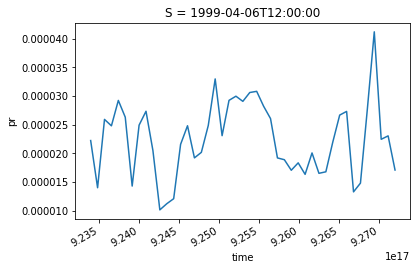

In [21]:
temp.pr.sel(lat=slice(25,50), lon=slice(230,300)).mean(dim=['lat','lon']).unstack('L2').plot()

In [73]:
temp = xr.open_dataset('/Data2/SubX/NASA/GEOS_V2p1/pr_sfc/1999/apr/pr_sfc_GMAOGEOS_06apr1999_00z_d01_d45_m01.nc')
temp.coords['S'] = 'S', np.atleast_1d(temp.time[0].values-) # I am setting S equal to the first time of the lead time, 
temp.rename({'time':'L'}, inplace=True)
temp['L']=(((temp.L-temp.S)*2.7777777777777778e-13).values.squeeze()).astype(float) 
temp

<xarray.Dataset>
Dimensions:  (L: 45, S: 1, lat: 181, lon: 360)
Coordinates:
  * L        (L) float64 0.0 24.0 48.0 72.0 96.0 120.0 144.0 168.0 192.0 ...
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 -85.0 -84.0 -83.0 ...
  * S        (S) datetime64[ns] 1999-04-06T12:00:00
Data variables:
    pr       (L, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.1 (http://mpimet.mpg.de/...
    history:      Mon Dec 18 10:08:46 2017: cdo.exe -L chname,PRECTOT,pr -set...
    Conventions:  COARDS
    History:      File written by MAPL_CFIO
    Title:        lena-S2S-2_1_CPLFCST20170811
    Contact:      http://gmao.gsfc.nasa.gov
    Institution:  NASA Global Modeling and Assimilation Office
    References:   http://gmao.gsfc.nasa.gov
    Comment:      lena-S2S-2_1_CPLFCST20170811
    CDO:          Climate Data Operators version 1.9.1 (http://mpimet.mpg.de/...

In [89]:
temp.h

<xarray.Dataset>
Dimensions:  (L: 45, S: 1, lat: 181, lon: 360)
Coordinates:
  * L        (L) float64 0.0 24.0 48.0 72.0 96.0 120.0 144.0 168.0 192.0 ...
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 -85.0 -84.0 -83.0 ...
  * S        (S) datetime64[ns] 1999-04-06T12:00:00
Data variables:
    pr       (L, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.1 (http://mpimet.mpg.de/...
    history:      Mon Dec 18 10:08:46 2017: cdo.exe -L chname,PRECTOT,pr -set...
    Conventions:  COARDS
    History:      File written by MAPL_CFIO
    Title:        lena-S2S-2_1_CPLFCST20170811
    Contact:      http://gmao.gsfc.nasa.gov
    Institution:  NASA Global Modeling and Assimilation Office
    References:   http://gmao.gsfc.nasa.gov
    Comment:      lena-S2S-2_1_CPLFCST20170811
    CDO:          Climate Data Operators version 1.9.1 (http://mpimet.mpg.de/...

## Concatenating along two dimensions is still not possible. Bcause the info on the file name is also not easy to get into with a preprocessing function, I decided to use the glob step - that is the creation of the list of files, to select the ensemble members looping and concatenation

## for a general example look here: https://stackoverflow.com/questions/47545138/python-xarray-open-mfdataset-concat-along-two-dimensions



In [71]:
temp = xr.open_dataset('/Data2/SubX/NASA/GEOS_V2p1/pr_sfc/1999/apr/pr_sfc_GMAOGEOS_06apr1999_00z_d01_d45_m01.nc')

In [72]:
temp

<xarray.Dataset>
Dimensions:  (lat: 181, lon: 360, time: 45)
Coordinates:
  * time     (time) datetime64[ns] 1999-04-06T12:00:00 1999-04-07T12:00:00 ...
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 -85.0 -84.0 -83.0 ...
Data variables:
    pr       (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.1 (http://mpimet.mpg.de/...
    history:      Mon Dec 18 10:08:46 2017: cdo.exe -L chname,PRECTOT,pr -set...
    Conventions:  COARDS
    History:      File written by MAPL_CFIO
    Title:        lena-S2S-2_1_CPLFCST20170811
    Contact:      http://gmao.gsfc.nasa.gov
    Institution:  NASA Global Modeling and Assimilation Office
    References:   http://gmao.gsfc.nasa.gov
    Comment:      lena-S2S-2_1_CPLFCST20170811
    CDO:          Climate Data Operators version 1.9.1 (http://mpimet.mpg.de/...

In [41]:
temp.coords['S'] = 'S', np.atleast_1d(temp.time[0].values) # I am setting S equal to the first time of the lead time, 
    

In [46]:
temp

<xarray.Dataset>
Dimensions:  (L: 45, S: 1, lat: 181, lon: 360, time: 45)
Coordinates:
  * time     (time) datetime64[ns] 1999-04-01T12:00:00 1999-04-02T12:00:00 ...
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 -85.0 -84.0 -83.0 ...
  * S        (S) datetime64[ns] 1999-04-01T12:00:00
  * L        (L) float64 0.0 24.0 48.0 72.0 96.0 120.0 144.0 168.0 192.0 ...
Data variables:
    pr       (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.1 (http://mpimet.mpg.de/...
    history:      Mon Dec 18 10:08:49 2017: cdo.exe -L chname,PRECTOT,pr -set...
    Conventions:  COARDS
    History:      File written by MAPL_CFIO
    Title:        lena-S2S-2_1_CPLFCST20170811
    Contact:      http://gmao.gsfc.nasa.gov
    Institution:  NASA Global Modeling and Assimilation Office
    References:   http://gmao.gsfc.nasa.gov
    Comment:      lena-S2S-2_1_CPLFCST20170811

In [43]:
temp.coords['L'] = 'L', (((temp.time-temp.S)*2.7777777777777778e-13).values.squeeze()).astype(float) 

In [49]:
tt = temp.pr.reindex({'time':temp.L, 'lat':temp.lat, 'lon':temp.lon})

In [50]:
tt

<xarray.DataArray 'pr' (time: 45, lat: 181, lon: 360)>
array([[[  1.063718e-09,   1.063718e-09, ...,   1.063718e-09,   1.063718e-09],
        [  5.492151e-10,   5.425709e-10, ...,   5.629206e-10,   5.559938e-10],
        ..., 
        [  4.183768e-06,   4.171839e-06, ...,   4.209483e-06,   4.196310e-06],
        [  6.807067e-06,   6.807067e-06, ...,   6.807067e-06,   6.807067e-06]],

       [[  1.487170e-12,   1.487170e-12, ...,   1.487170e-12,   1.487170e-12],
        [  1.961077e-10,   1.877001e-10, ...,   2.129633e-10,   2.045420e-10],
        ..., 
        [  1.035707e-06,   1.000619e-06, ...,   1.105430e-06,   1.070657e-06],
        [  4.268129e-07,   4.268129e-07, ...,   4.268129e-07,   4.268129e-07]],

       ..., 
       [[  1.774676e-07,   1.774676e-07, ...,   1.774676e-07,   1.774676e-07],
        [  1.382420e-07,   1.360687e-07, ...,   1.427318e-07,   1.404645e-07],
        ..., 
        [  3.896335e-06,   3.953094e-06, ...,   3.785516e-06,   3.840493e-06],
        [  3.6728

In [23]:
import glob

In [ ]:
1999/apr

In [74]:
ds_M = []
for ensnum in np.arange(1,2):
    mylist = glob.glob('/Data2/SubX/NASA/GEOS_V2p1/pr_sfc/1999/apr/*_m0'+np.str(ensnum)+'.nc') #[f for f in glob.glob('/Data2/SubX/NASA/GEOS_V2p1/pr_sfc/*/*/*_m01.nc')]
#     print mylist[0:20]
    # the listing of the files it's not in chronological order because the month is a string and not a number.
    # however I will fix that after, by sorting by S

    #I am going to opne only a few I am going to put them backwards to show how to sort them correctly after
    pr_S=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf2, autoclose=True)
    pr_S.coords['M'] = 'M', np.atleast_1d(ensnum)
#     print pr_S.L
    ds_M.append(pr_S)
    del pr_S
ds_all = xr.concat(ds_M, dim='M')
del ds_M
print ds_all
print ds_all.nbytes/1e9

# ds_all.to_zarr('GEOS_V2p1/')
# del ds_all

<xarray.Dataset>
Dimensions:  (L: 45, M: 1, S: 6, lat: 181, lon: 360)
Coordinates:
  * L        (L) float64 0.0 24.0 48.0 72.0 96.0 120.0 144.0 168.0 192.0 ...
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 -85.0 -84.0 -83.0 ...
  * S        (S) datetime64[ns] 1999-04-01T12:00:00 1999-04-06T12:00:00 ...
  * M        (M) int64 1
Data variables:
    pr       (M, S, L, lat, lon) float32 dask.array<shape=(1, 6, 45, 181, 360), chunksize=(1, 1, 45, 181, 360)>
Attributes:
    CDI:          Climate Data Interface version 1.9.1 (http://mpimet.mpg.de/...
    history:      Mon Dec 18 10:08:49 2017: cdo.exe -L chname,PRECTOT,pr -set...
    Conventions:  COARDS
    History:      File written by MAPL_CFIO
    Title:        lena-S2S-2_1_CPLFCST20170811
    Contact:      http://gmao.gsfc.nasa.gov
    Institution:  NASA Global Modeling and Assimilation Office
    References:   http://gmao.gsfc.nasa.gov
    Commen

In [75]:
ds_all = ds_all.sortby('S')

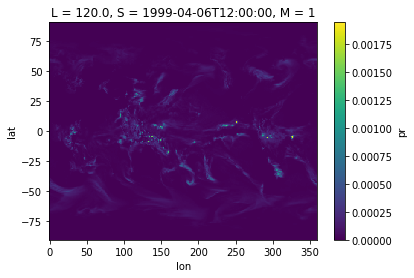

In [80]:
ds_all.sel(S='1999-04-06').sel(L=120).pr.plot()

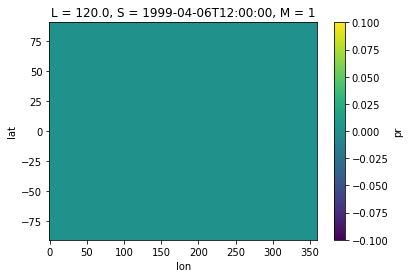

In [82]:
(ds_all.sel(S='1999-04-06').sel(L=120)-temp.sel(L=120)).pr.plot()

In [69]:
ds_M = []
for ensnum in np.arange(1,5):
    mylist = glob.glob('/Data2/SubX/NASA/GEOS_V2p1/pr_sfc/1999/jan//*_m0'+np.str(ensnum)+'.nc') #[f for f in glob.glob('/Data2/SubX/NASA/GEOS_V2p1/pr_sfc/*/*/*_m01.nc')]
#     print mylist[0:20]
    # the listing of the files it's not in chronological order because the month is a string and not a number.
    # however I will fix that after, by sorting by S

    #I am going to opne only a few I am going to put them backwards to show how to sort them correctly after
    pr_S=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf2, autoclose=True)
    pr_S.coords['M'] = 'M', np.atleast_1d(ensnum)
#     print pr_S.L
    ds_M.append(pr_S)
    del pr_S
ds_all = xr.concat(ds_M, dim='M')
del ds_M
print ds_all
print ds_all.nbytes/1e9

# ds_all.to_zarr('GEOS_V2p1/')
# del ds_all

<xarray.Dataset>
Dimensions:  (L: 45, M: 4, S: 7, lat: 181, lon: 360)
Coordinates:
  * L        (L) float64 0.0 24.0 48.0 72.0 96.0 120.0 144.0 168.0 192.0 ...
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 -85.0 -84.0 -83.0 ...
  * S        (S) datetime64[ns] 1999-01-01T12:00:00 1999-01-06T12:00:00 ...
  * M        (M) int64 1 2 3 4
Data variables:
    pr       (M, S, L, lat, lon) float32 dask.array<shape=(4, 7, 45, 181, 360), chunksize=(1, 1, 45, 181, 360)>
Attributes:
    CDI:          Climate Data Interface version 1.9.1 (http://mpimet.mpg.de/...
    history:      Wed Nov 22 14:57:23 2017: cdo.exe -L chname,PRECTOT,pr -set...
    Conventions:  COARDS
    History:      File written by MAPL_CFIO
    Title:        lena-S2S-2_1_CPLFCST20170811
    Contact:      http://gmao.gsfc.nasa.gov
    Institution:  NASA Global Modeling and Assimilation Office
    References:   http://gmao.gsfc.nasa.gov
    

In [70]:
ds_all.S+ds_all.L

TypeError: ufunc add cannot use operands with types dtype('<M8[ns]') and dtype('float64')

In [83]:
for iy in np.arange(1999, 2000):
    ds_M = []
    for ensnum in np.arange(1,5):
        mylist = glob.glob('/Data2/SubX/NASA/GEOS_V2p1/pr_sfc/'+np.str(iy)+'/*/*_m0'+np.str(ensnum)+'.nc') #[f for f in glob.glob('/Data2/SubX/NASA/GEOS_V2p1/pr_sfc/*/*/*_m01.nc')]
    #     print mylist[0:20]
        # the listing of the files it's not in chronological order because the month is a string and not a number.
        # however I will fix that after, by sorting by S

        #I am going to opne only a few I am going to put them backwards to show how to sort them correctly after
        pr_S=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf2, autoclose=True)
        pr_S.coords['M'] = 'M', np.atleast_1d(ensnum)
        ds_M.append(pr_S)
        del pr_S
    ds_all = xr.concat(ds_M, dim='M')
    del ds_M
#     directory_tosave = '/crunch/c2/clepore/GEOS_V2p1/'+np.str(iy)
#     if not os.path.exists(directory_tosave):
#         os.makedirs(directory_tosave)
    
#     ds_all.to_zarr(directory_tosave)
#     !du -sh '/crunch/c2/clepore/GEOS_V2p1/'
#     del ds_all

In [86]:
ds_all

<xarray.Dataset>
Dimensions:  (L: 45, M: 4, S: 73, lat: 181, lon: 360)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 -85.0 -84.0 -83.0 ...
  * L        (L) float64 0.0 24.0 48.0 72.0 96.0 120.0 144.0 168.0 192.0 ...
  * S        (S) datetime64[ns] 1999-07-05T12:00:00 1999-07-10T12:00:00 ...
  * M        (M) int64 1 2 3 4
Data variables:
    pr       (M, S, L, lat, lon) float32 dask.array<shape=(4, 73, 45, 181, 360), chunksize=(1, 1, 45, 181, 360)>
Attributes:
    CDI:          Climate Data Interface version 1.7.1 (http://mpimet.mpg.de/...
    history:      Mon Jun 26 11:23:16 2017: cdo.exe -L chname,PRECTOT,pr -set...
    Conventions:  COARDS
    History:      File written by MAPL_CFIO
    Title:        yuri-S2S-2_1_UNSTABLE
    Contact:      http://gmao.gsfc.nasa.gov
    Institution:  NASA Global Modeling and Assimilation Office
    References:   http://gmao.gsfc.nasa.gov
    Comme

In [11]:
import os


In [88]:
for iy in np.arange(1999, 2017):
    ds_M = []
    for ensnum in np.arange(1,5):
        mylist = glob.glob('/Data2/SubX/NASA/GEOS_V2p1/pr_sfc/'+np.str(iy)+'/*/*_m0'+np.str(ensnum)+'.nc') #[f for f in glob.glob('/Data2/SubX/NASA/GEOS_V2p1/pr_sfc/*/*/*_m01.nc')]
    #     print mylist[0:20]
        # the listing of the files it's not in chronological order because the month is a string and not a number.
        # however I will fix that after, by sorting by S

        #I am going to opne only a few I am going to put them backwards to show how to sort them correctly after
        pr_S=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf2, autoclose=True)
        pr_S.coords['M'] = 'M', np.atleast_1d(ensnum)
        ds_M.append(pr_S)
        del pr_S
    ds_all = xr.concat(ds_M, dim='M')
    del ds_M
    directory_tosave = '/crunch/c2/clepore/GEOS_V2p1_L/'+np.str(iy)
    if not os.path.exists(directory_tosave):
        os.makedirs(directory_tosave)
    
    ds_all.to_zarr(directory_tosave)
    !du -sh '/crunch/c2/clepore/GEOS_V2p1_L/'
    del ds_all

4.3G	/crunch/c2/clepore/GEOS_V2p1_L/
8.6G	/crunch/c2/clepore/GEOS_V2p1_L/
13G	/crunch/c2/clepore/GEOS_V2p1_L/
18G	/crunch/c2/clepore/GEOS_V2p1_L/
16G	/crunch/c2/clepore/GEOS_V2p1_L/
20G	/crunch/c2/clepore/GEOS_V2p1_L/
24G	/crunch/c2/clepore/GEOS_V2p1_L/
29G	/crunch/c2/clepore/GEOS_V2p1_L/
33G	/crunch/c2/clepore/GEOS_V2p1_L/
37G	/crunch/c2/clepore/GEOS_V2p1_L/
33G	/crunch/c2/clepore/GEOS_V2p1_L/
37G	/crunch/c2/clepore/GEOS_V2p1_L/
41G	/crunch/c2/clepore/GEOS_V2p1_L/
45G	/crunch/c2/clepore/GEOS_V2p1_L/
50G	/crunch/c2/clepore/GEOS_V2p1_L/
46G	/crunch/c2/clepore/GEOS_V2p1_L/
51G	/crunch/c2/clepore/GEOS_V2p1_L/
55G	/crunch/c2/clepore/GEOS_V2p1_L/


In [14]:
# for iy in np.arange(1999, 2017):
#     ds_M = []
#     for ensnum in np.arange(1,5):
#         mylist = glob.glob('/Data2/SubX/NASA/GEOS_V2p1/pr_sfc/'+np.str(iy)+'/*/*_m0'+np.str(ensnum)+'.nc') #[f for f in glob.glob('/Data2/SubX/NASA/GEOS_V2p1/pr_sfc/*/*/*_m01.nc')]
#     #     print mylist[0:20]
#         # the listing of the files it's not in chronological order because the month is a string and not a number.
#         # however I will fix that after, by sorting by S

#         #I am going to opne only a few I am going to put them backwards to show how to sort them correctly after
#         pr_S=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf, autoclose=True)
#         pr_S.coords['M'] = 'M', np.atleast_1d(ensnum)
#         ds_M.append(pr_S)
#         del pr_S
#     ds_all = xr.concat(ds_M, dim='M')
#     del ds_M
#     directory_tosave = '/crunch/c2/clepore/GEOS_V2p1/'+np.str(iy)
#     if not os.path.exists(directory_tosave):
#         os.makedirs(directory_tosave)
    
#     ds_all.to_zarr(directory_tosave)
#     !du -sh '/crunch/c2/clepore/GEOS_V2p1/'
#     del ds_all

4.3G	/crunch/c2/clepore/GEOS_V2p1/
8.6G	/crunch/c2/clepore/GEOS_V2p1/
11G	/crunch/c2/clepore/GEOS_V2p1/
15G	/crunch/c2/clepore/GEOS_V2p1/
20G	/crunch/c2/clepore/GEOS_V2p1/
24G	/crunch/c2/clepore/GEOS_V2p1/
28G	/crunch/c2/clepore/GEOS_V2p1/
25G	/crunch/c2/clepore/GEOS_V2p1/
29G	/crunch/c2/clepore/GEOS_V2p1/
34G	/crunch/c2/clepore/GEOS_V2p1/
38G	/crunch/c2/clepore/GEOS_V2p1/
36G	/crunch/c2/clepore/GEOS_V2p1/
41G	/crunch/c2/clepore/GEOS_V2p1/
45G	/crunch/c2/clepore/GEOS_V2p1/
49G	/crunch/c2/clepore/GEOS_V2p1/
54G	/crunch/c2/clepore/GEOS_V2p1/
52G	/crunch/c2/clepore/GEOS_V2p1/
56G	/crunch/c2/clepore/GEOS_V2p1/


In [ ]:
# save folder to cloud!

In [15]:
!gsutil -m cp -r /crunch/c2/clepore/GEOS_V2p1/ gs://pangeo-data/

/bin/sh: gsutil: command not found


In [ ]:
gsutil -m cp -r /crunch/c2/clepore/GEOS_V2p1 gs://pangeo-data/

In [9]:
!mkdir GEOS_V2p1

In [16]:
37138924/1e9


0.037138924

In [11]:
ds_all.nbytes/1e9

30.823294584

In [6]:
ds_M

[]

In [9]:
ds_allM = ds_all.mean(dim='M')
ds_allM.nbytes/1e9

7.705829752

In [207]:
del ds_all

In [214]:
dsCONUS = ds_allM.sel(lat=slice(25,50),lon=slice(-130,-60)).mean(dim=['lat','lon'])
del ds_allM

### now they are not in order

In [197]:
ds_all.S

<xarray.DataArray 'S' (S: 20)>
array(['1999-11-12T12:00:00.000000000', '1999-11-07T12:00:00.000000000',
       '1999-11-02T12:00:00.000000000', '1999-09-28T12:00:00.000000000',
       '1999-09-23T12:00:00.000000000', '1999-09-18T12:00:00.000000000',
       '1999-09-13T12:00:00.000000000', '1999-09-08T12:00:00.000000000',
       '1999-09-03T12:00:00.000000000', '1999-08-29T12:00:00.000000000',
       '1999-08-24T12:00:00.000000000', '1999-08-19T12:00:00.000000000',
       '1999-08-14T12:00:00.000000000', '1999-08-09T12:00:00.000000000',
       '1999-08-04T12:00:00.000000000', '1999-07-30T12:00:00.000000000',
       '1999-07-25T12:00:00.000000000', '1999-07-20T12:00:00.000000000',
       '1999-07-15T12:00:00.000000000', '1999-07-10T12:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * S        (S) datetime64[ns] 1999-11-12T12:00:00 1999-11-07T12:00:00 ...

In [198]:
ds_all = ds_all.sortby('S')

In [199]:
ds_all.S

<xarray.DataArray 'S' (S: 20)>
array(['1999-07-10T12:00:00.000000000', '1999-07-15T12:00:00.000000000',
       '1999-07-20T12:00:00.000000000', '1999-07-25T12:00:00.000000000',
       '1999-07-30T12:00:00.000000000', '1999-08-04T12:00:00.000000000',
       '1999-08-09T12:00:00.000000000', '1999-08-14T12:00:00.000000000',
       '1999-08-19T12:00:00.000000000', '1999-08-24T12:00:00.000000000',
       '1999-08-29T12:00:00.000000000', '1999-09-03T12:00:00.000000000',
       '1999-09-08T12:00:00.000000000', '1999-09-13T12:00:00.000000000',
       '1999-09-18T12:00:00.000000000', '1999-09-23T12:00:00.000000000',
       '1999-09-28T12:00:00.000000000', '1999-11-02T12:00:00.000000000',
       '1999-11-07T12:00:00.000000000', '1999-11-12T12:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * S        (S) datetime64[ns] 1999-07-10T12:00:00 1999-07-15T12:00:00 ...

In [192]:
# ds_all.pr.sel(S='1999-07-15').mean(dim=['time','M']).plot()